In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 45s 0us/step


In [5]:
#Scaling the data
train_images,test_images=train_images/255, test_images/255

In [6]:
#Defining labels
class_labels = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

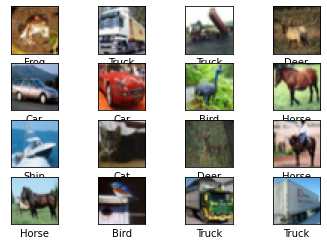

In [9]:
#Visualizing
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_labels[train_labels[i][0]])
plt.show()
    

In [11]:
#Training on only 25000 images
train_images=train_images[:25000]
train_labels=train_labels[:25000]
test_images=test_images[:5000]
test_labels=test_labels[:5000]

In [12]:
#Creating the model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [13]:
#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
782/782 [==============================] - 32s 41ms/step - loss: 1.6473 - accuracy: 0.3951 - val_loss: 1.4064 - val_accuracy: 0.4956
Epoch 2/10
782/782 [==============================] - 31s 40ms/step - loss: 1.3093 - accuracy: 0.5333 - val_loss: 1.2971 - val_accuracy: 0.5368
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 1.1585 - accuracy: 0.5918 - val_loss: 1.2491 - val_accuracy: 0.5610
Epoch 4/10
782/782 [==============================] - 29s 38ms/step - loss: 1.0452 - accuracy: 0.6302 - val_loss: 1.0727 - val_accuracy: 0.6302
Epoch 5/10
782/782 [==============================] - 29s 37ms/step - loss: 0.9534 - accuracy: 0.6648 - val_loss: 1.1321 - val_accuracy: 0.6126
Epoch 6/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8865 - accuracy: 0.6890 - val_loss: 1.0255 - val_accuracy: 0.6388
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8241 - accuracy: 0.7103 - val_loss: 1.0078 - val_accuracy:

In [18]:
loss,accuracy=model.evaluate(test_images,test_labels)
accuracy


157/157 [==============================] - 2s 10ms/step - loss: 0.9908 - accuracy: 0.6736


0.6736000180244446

In [19]:
model.save('image_classifier.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: image_classifier.model\assets


In [20]:
model_test=models.load_model('image_classifier.model')

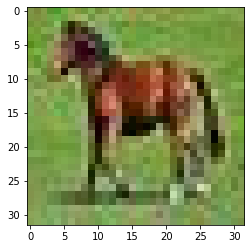

In [24]:
img=cv.imread('rsz_horse-3611921_1920.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)

In [27]:
prediction=model_test.predict(np.array([img])/255)
index=np.argmax(prediction)
class_labels[index]

'Horse'